# Proyek Analisis Data: E-Commerce Public Dataset
## Data Diri
Nama: Muhammad Ilham Siddiqqulhakim <br>
Email: siddiqqulhakim@gmail.com <br>
Id Dicoding: siddiqqulhakim

## Menentukan Pertanyaan Bisnis
<ul>
    <li>Berapa lama rata-rata sebuah orderan di approve dan dikirimkan?</li>
    <li>Bagaimana score/review tiap kategori tiap score nya?</li>
</ul>

## Menyaipkan semua library yang dibutuhkan

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns



## Data Wrangling

### Gathering Data

In [2]:
customers_df = pd.read_csv("data/customers_dataset.csv")
geolocation_df = pd.read_csv("data/geolocation_dataset.csv")
order_items_df = pd.read_csv("data/order_items_dataset.csv")
order_payments_df = pd.read_csv("data/order_payments_dataset.csv")
order_reviews_df = pd.read_csv("data/order_reviews_dataset.csv")
orders_df = pd.read_csv("data/orders_dataset.csv")
product_category_name_translation_df = pd.read_csv("data/product_category_name_translation.csv")
products_df = pd.read_csv("data/products_dataset.csv")
sellers_df = pd.read_csv("data/sellers_dataset.csv")

### Assessing Data and Cleaning Data

In [3]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [4]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [5]:
geolocation_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [6]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  261831


In [7]:
geolocation_df.drop_duplicates(inplace=True)

In [8]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  0


In [9]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [10]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

Jumlah duplikasi:  0


In [11]:
order_payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [12]:
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())

Jumlah duplikasi:  0


In [13]:
#Tidak akan dilakukan cleaning pada title dan message yang null karena kita tidak akan mengelola field tersebut dan itu hal yang wajar jika title dan message dalam review produk kosong
order_reviews_df.isna().sum()

datetime_columns = ["review_creation_date", "review_answer_timestamp"]
 
for column in datetime_columns:
  order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

In [14]:
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())

Jumlah duplikasi:  0


In [15]:
orders_df.isna().sum()

datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
 
for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [16]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [17]:
product_category_name_translation_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [18]:
print("Jumlah duplikasi: ", product_category_name_translation_df.duplicated().sum())

Jumlah duplikasi:  0


In [19]:
#membersihkan data product yang memiliki name na karena seharusnya produk memiliki nama
products_df.isna().sum()
products_df[products_df.product_name_lenght.isna()]
products_df = products_df.dropna(subset=['product_name_lenght'])
products_df.isna().sum()
products_df.head()


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [20]:
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

## Exploratory Data Analysis (EDA)

In [21]:
orderitem_order_df = pd.merge(
    left=order_items_df,
    right=orders_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

orderitem_order_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17


In [22]:
orderitem_order_product_df = pd.merge(
    left=orderitem_order_df,
    right=products_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)

orderitem_order_product_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,order_delivered_customer_date,order_estimated_delivery_date,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,2017-09-20 23:43:48,2017-09-29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,2017-05-12 16:04:24,2017-05-15,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,2018-01-22 13:19:16,2018-02-05,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,2018-08-14 13:32:39,2018-08-20,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,2017-03-01 16:42:31,2017-03-17,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [23]:
orderitem_order_product_category_df = pd.merge(
    left=orderitem_order_product_df,
    right=product_category_name_translation_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)

orderitem_order_product_category_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,order_estimated_delivery_date,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,2017-09-29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,2017-05-15,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,2018-02-05,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,2018-08-20,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,2017-03-17,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools


In [24]:
orderitem_order_product_category_df.isna().sum()

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1194
order_delivered_customer_date    2454
order_estimated_delivery_date       0
product_category_name            1603
product_name_lenght              1603
product_description_lenght       1603
product_photos_qty               1603
product_weight_g                 1604
product_length_cm                1604
product_height_cm                1604
product_width_cm                 1604
product_category_name_english    1627
dtype: int64

In [25]:
orderitem_order_product_category_df['product_category_name_english'].fillna(orderitem_order_product_category_df['product_category_name'], inplace=True)

In [26]:
orderitem_order_product_category_df.isna().sum()

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1194
order_delivered_customer_date    2454
order_estimated_delivery_date       0
product_category_name            1603
product_name_lenght              1603
product_description_lenght       1603
product_photos_qty               1603
product_weight_g                 1604
product_length_cm                1604
product_height_cm                1604
product_width_cm                 1604
product_category_name_english    1603
dtype: int64

In [27]:
orderitem_order_product_category_df['product_category_name_english'].fillna("no_category", inplace=True)
orderitem_order_product_category_df.isna().sum()

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1194
order_delivered_customer_date    2454
order_estimated_delivery_date       0
product_category_name            1603
product_name_lenght              1603
product_description_lenght       1603
product_photos_qty               1603
product_weight_g                 1604
product_length_cm                1604
product_height_cm                1604
product_width_cm                 1604
product_category_name_english       0
dtype: int64

In [28]:
orderitem_order_product_category_df.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False).reset_index().head(10)

,product_category_name_english,product_id
0,bed_bath_table,3029
1,sports_leisure,2867
2,furniture_decor,2657
3,health_beauty,2444
4,housewares,2335
5,auto,1900
6,computers_accessories,1639
7,toys,1411
8,watches_gifts,1329
9,telephony,1134


In [29]:
all_df = pd.merge(
    left=orderitem_order_product_category_df,
    right=order_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

In [30]:
# all_df.head()
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113314 entries, 0 to 113313
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113314 non-null  object        
 1   order_item_id                  113314 non-null  int64         
 2   product_id                     113314 non-null  object        
 3   seller_id                      113314 non-null  object        
 4   shipping_limit_date            113314 non-null  object        
 5   price                          113314 non-null  float64       
 6   freight_value                  113314 non-null  float64       
 7   customer_id                    113314 non-null  object        
 8   order_status                   113314 non-null  object        
 9   order_purchase_timestamp       113314 non-null  datetime64[ns]
 10  order_approved_at              113299 non-null  datetime64[ns]
 11  

### Pertanyaan 1 : Berapa lama rata-rata sebuah orderan di approve dan dikirimkan?

In [31]:
all_df['approval_time'] = all_df['order_approved_at'] - all_df['order_purchase_timestamp']
all_df['delivery_time'] = all_df['order_delivered_customer_date'] - all_df['order_purchase_timestamp']

# Convert the time differences to days
all_df['approval_time_days'] = all_df['approval_time'].dt.days
all_df['delivery_time_days'] = all_df['delivery_time'].dt.days

# Calculate the average time for order approval and delivery
avg_approval_time = all_df['approval_time_days'].mean()
avg_delivery_time = all_df['delivery_time_days'].mean()

print(f"Average time for order approval: {avg_approval_time} days")
print(f"Average time for delivery: {avg_delivery_time} days")

Average time for order approval: 0.2733386878966275 days
Average time for delivery: 12.012414402872635 days


### Pertanyaan 2 : Bagaimana score/review tiap kategori tiap score nya?

In [32]:
all_df.groupby(by=["product_category_name_english", "review_score"]).agg({
    "review_score": "count",
})

review_score
product_category_name_english review_score              
agro_industry_and_commerce    1.0                     27
                              2.0                      7
                              3.0                     13
                              4.0                     57
                              5.0                    108
...                                                  ...
watches_gifts                 1.0                    751
                              2.0                    216
                              3.0                    532
                              4.0                   1120
                              5.0                   3331

[353 rows x 1 columns]

In [33]:
folder_path = "dashboard"
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
all_df.to_csv(os.path.join(folder_path, "main_data.csv"), index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1 : Berapa lama rata-rata sebuah orderan di approve dan dikirimkan?

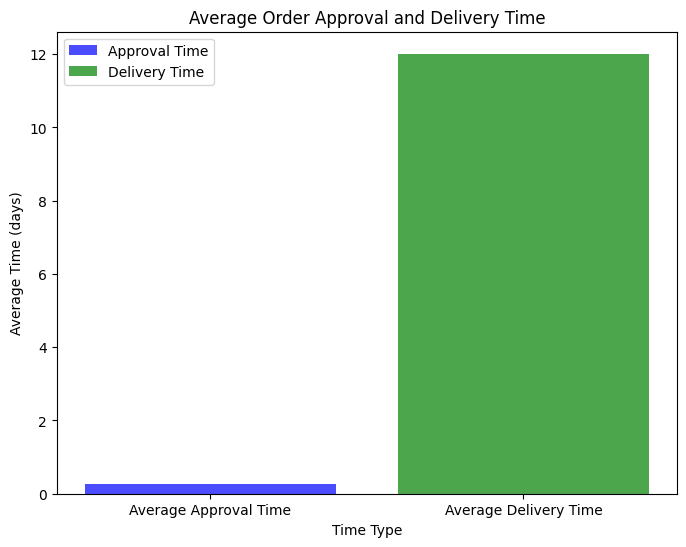

In [34]:
plt.figure(figsize=(8, 6))
plt.bar("Average Approval Time", avg_approval_time, color='b', alpha=0.7, label='Approval Time')
plt.bar("Average Delivery Time", avg_delivery_time, color='g', alpha=0.7, label='Delivery Time')

plt.xlabel('Time Type')
plt.ylabel('Average Time (days)')
plt.title('Average Order Approval and Delivery Time')
plt.legend()
plt.show()

Pada visualisasi ini, kita menggunakan grafik batang (bar chart) untuk mengilustrasikan rata-rata waktu persetujuan pesanan dan pengiriman. Terdapat dua bar, satu untuk waktu persetujuan pesanan (Approval Time) dan satu lagi untuk waktu pengiriman (Delivery Time). Visualisasi ini membantu dalam memahami secara jelas perbedaan antara kedua metrik ini.

Analisis Waktu Rata-rata Persetujuan Pesanan (Average Approval Time): Jika garis biru pada grafik berada pada angka tertentu, itu menunjukkan berapa rata-rata waktu dalam hari yang dibutuhkan untuk persetujuan pesanan. Dalam bisnis e-commerce, ini adalah indikator seberapa cepat pesanan pelanggan disetujui setelah mereka melakukan pembelian.

Analisis Waktu Rata-rata Pengiriman (Average Delivery Time): Garis hijau pada grafik mewakili rata-rata waktu dalam hari yang dibutuhkan untuk pengiriman pesanan ke pelanggan setelah persetujuan. Ini memberikan wawasan tentang seberapa efisien proses pengiriman dalam bisnis.

### Pertanyaan 2 : Bagaimana score/review tiap kategori tiap score nya?

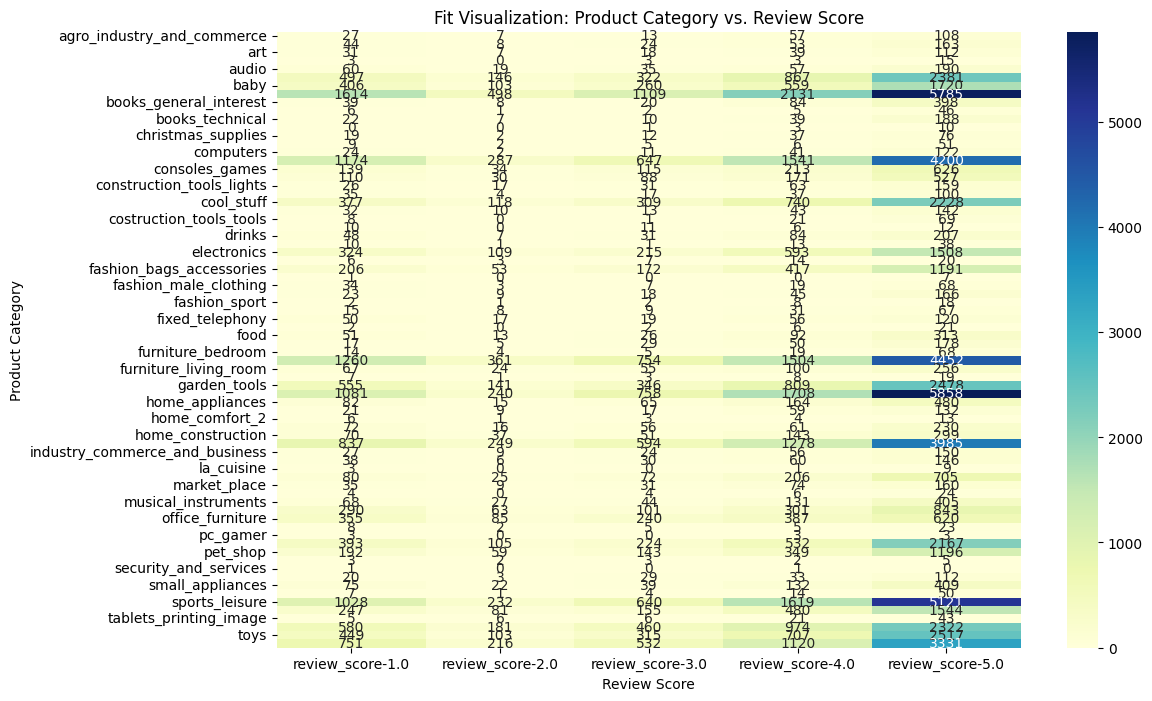

In [35]:
pivot_table = all_df.groupby(by=["product_category_name_english", "review_score"]).agg({
    "review_score": "count",
}).unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt='d', cbar=True)

plt.xlabel("Review Score")
plt.ylabel("Product Category")
plt.title("Fit Visualization: Product Category vs. Review Score")
plt.show()

Pada visualisasi ini, kita menggunakan heatmap untuk memvisualisasikan hubungan antara kategori produk dan skor ulasan. Setiap sel dalam heatmap mewakili jumlah ulasan (count) untuk kombinasi kategori produk dan skor ulasan tertentu.

Analisis Hubungan Kategori Produk dan Skor Ulasan: Dengan melihat heatmap, kita dapat dengan mudah mengidentifikasi kategori produk yang mungkin memiliki lebih banyak ulasan positif atau negatif. Sel-sel yang berwarna lebih cerah menunjukkan jumlah ulasan yang lebih tinggi, sementara yang lebih gelap menunjukkan jumlah ulasan yang lebih rendah. Ini membantu dalam memahami bagaimana berbagai kategori produk menerima ulasan dari pelanggan.

Distribusi Skor Ulasan: Juga dapat dilihat bagaimana skor ulasan terdistribusi dalam berbagai kategori produk. Apakah kategori produk tertentu cenderung menerima skor tinggi atau rendah?

## Conclusion
<ul>
    <li>Pertanyaan 1: rata-rata suatu orderan di approve adalah 0.3 hari dan rata-rata dikirimnya adalah 12 hari</li>
    <li>Pertanyaan 2: dapat dilihat pada tabel untuk distribusi scorenya</li>
</ul>